In [19]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

### ¿Geopandas?

Geopandas enables the use and manipulation of geospatial data in Python. It extends the common datatype used in pandas to allow for the many and unique geometric operations: GeoSeries and GeoDataFrame. Geopandas is also built on top of shapely for its geometric operation; its underlying datatype allows Geopandas to run blazingly fast and is appropriate for many machine learning pipelines that require large geospatial datasets.

### Instalation 

Following steps:

#### 1. create new environment

conda creare -name new_env

#### 2. Activate new environment
conda activate new_env

#### 3. Install package 

conda install -c conda-forge python=3 geopandas

### Geopandas data types

Shapefile (.shp): vector data that stores geospatial information such as topology, shape geometry, coordinate etc

GeoJSON (.geojson): geospatial information and relevant characteristics (object or string)

Finally, Geopandas creates an additional geometry column


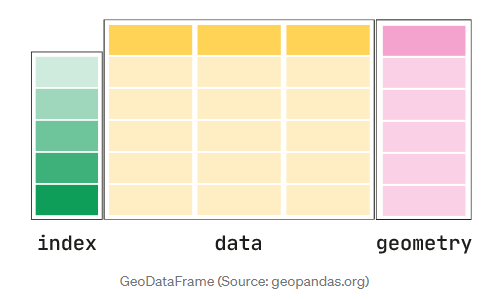


### Coordinate Reference Systems (crs)

The coordinate reference systems tell us how GeodataFrame o GeoSeries relate to places on Earth

#### relevant operations: setting a projection and re-projecting 

setting projection: geopandas.read_file() most of time includes projection information. Check using "Geoseries.crs"
If GeoDataframe does not include projection, hence use data["geometry"].set_crs(epsg=4326) for WGS-84.

### WGS-84: 
The Global Positioning System uses the World Geodetic System (WGS84) as its reference coordinate system. It's made up of a reference ellipsoid, a standard coordinate system, altitude data, and a geoid

### Reprojecting:

In somes cases, due to distortions in bidimensional plane and your application of geospatial data, re-projection is required. 

A commonly used default is Universal Transverse Mercator (UTM)







In [20]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [21]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [22]:
!pip install folium

In [23]:
# Gettting the character format (encoding type)

base = open(r'../_data/Datos_panel_distritos.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'utf-8'

## Covid Data

In [24]:
# Import csv file from panel covid information at distric level
# Panel data from march-2020 to first two wees of january-2022

cv_data = pd.read_csv( r'../_data/Datos_panel_distritos.csv', encoding = charenc)
cv_data.head( 5 )

,Código,Departamento,Provincia,Distrito,Mes,Año,Casos,Muertes Covid,Muertes totales
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,3,2020,0,0,16
1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,4,2020,47,0,5
2,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,5,2020,165,3,11
3,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,6,2020,119,2,15
4,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,7,2020,175,2,8


In [25]:
cv_data.dtypes

Código              int64
Departamento       object
Provincia          object
Distrito           object
Mes                 int64
Año                 int64
Casos               int64
Muertes Covid       int64
Muertes totales     int64
dtype: object

In [26]:
# rename variable to merge later 
cv_data = cv_data.rename({'Código':'UBIGEO'}, axis =1 )
cv_data.head( 5 )

,UBIGEO,Departamento,Provincia,Distrito,Mes,Año,Casos,Muertes Covid,Muertes totales
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,3,2020,0,0,16
1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,4,2020,47,0,5
2,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,5,2020,165,3,11
3,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,6,2020,119,2,15
4,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,7,2020,175,2,8


## Shape File

In [27]:
# Upload shape file at district level

maps = gpd.read_file(r'../_data/shape_file/DISTRITOS.shp')

In [28]:
maps

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...,...,...,...,...,...,...,...,...,...
1868,10,HUANUCO,1006,LEONCIO PRADO,100608,CASTILLO GRANDE,CASTILLO GRANDE,0001,1,INEI,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,10,HUANUCO,1006,LEONCIO PRADO,100609,PUEBLO NUEVO,PUEBLO NUEVO,0001,1,INEI,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,10,HUANUCO,1006,LEONCIO PRADO,100610,SANTO DOMINGO DE ANDA,PACAE,0001,1,INEI,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,21,PUNO,2111,SAN ROMAN,211105,SAN MIGUEL,SAN MIGUEL,0001,1,INEI,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


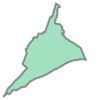

In [29]:
# Plot 1 district (its a collection of points)
maps["geometry"][100]

In [30]:
## Set of points for first district
maps.geometry[0].boundary.coords.xy

(array('d', [-75.31797010604475, -75.31710488392423, -75.31604648791898, -75.31537303628215, -75.31469932241646, -75.31392881111611, -75.3133303495971, -75.31169723519622, -75.30615235974136, -75.30464848475174, -75.30204673484673, -75.30106448524998, -75.29776760924966, -75.29447260989667, -75.28983985902022, -75.28862698442924, -75.2863086102684, -75.2851563586247, -75.28393560955703, -75.28272260912615, -75.28220311024171, -75.28202736045313, -75.28138673398348, -75.28156248370055, -75.28098236019497, -75.28017386006405, -75.27959373487306, -75.27774798404425, -75.27780860999633, -75.27711523520276, -75.27648235912312, -75.27555073511627, -75.27393360884412, -75.27306448398218, -75.27278123480181, -75.27197261018847, -75.27063673497003, -75.26936310921559, -75.26861523478374, -75.26768548488297, -75.26531248414989, -75.26329098403181, -75.26230660998112, -75.26178710908653, -75.26045898389629, -75.2592461099199, -75.25808785916968, -75.25611910895401, -75.25409760880586, -75.2502148

In [31]:
type(maps.geometry)

geopandas.geoseries.GeoSeries

In [32]:
#Check unique values

maps['IDDIST'].is_unique

True

In [33]:
maps['IDDIST'].unique().size

1873

In [34]:
# Select only relevant columns
maps = maps[['IDDIST', 'geometry']]
maps = maps.rename({'IDDIST':'UBIGEO'}, axis =1 )
maps

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [35]:
maps.dtypes

UBIGEO        object
geometry    geometry
dtype: object

In [36]:
# Object or srting to int

maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [37]:
#  WGS-84 (longitud-latitud projection) 
maps.crs

#system of coordenates: CRS (due to where we are)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

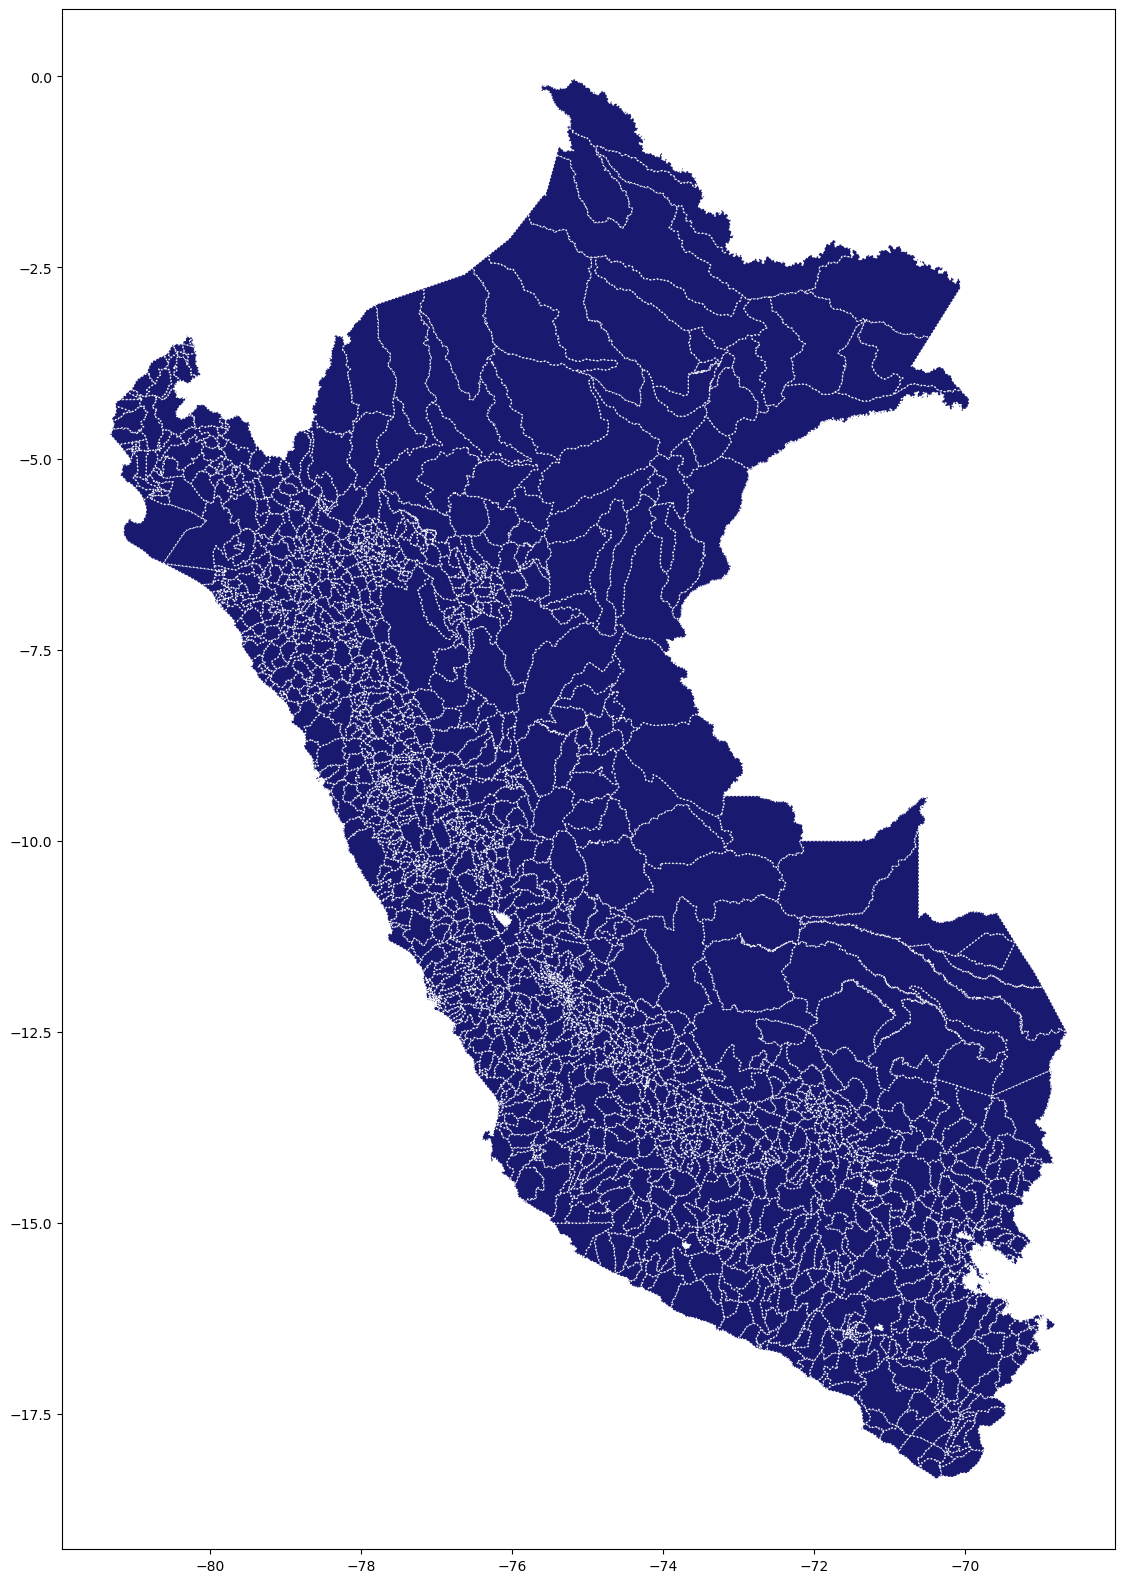

In [38]:
# Plot using geopandas

#figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

maps.plot(  ax=ax, color='midnightblue', linestyle='dotted',
            edgecolor='white' )
plt.show()

## Merge: Covid Data & Shapefile

In [39]:
# Merge using inner way to drop missing values 

dataset_cv = pd.merge(maps, cv_data, how="inner", on="UBIGEO")
dataset_cv

,UBIGEO,geometry,Departamento,Provincia,Distrito,Mes,Año,Casos,Muertes Covid,Muertes totales
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",HUANUCO,PUERTO INCA,CODO DEL POZUZO,3,2020,0,0,3
1,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",HUANUCO,PUERTO INCA,CODO DEL POZUZO,4,2020,0,1,2
2,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",HUANUCO,PUERTO INCA,CODO DEL POZUZO,5,2020,1,0,2
3,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",HUANUCO,PUERTO INCA,CODO DEL POZUZO,6,2020,7,0,1
4,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",HUANUCO,PUERTO INCA,CODO DEL POZUZO,7,2020,11,1,4
...,...,...,...,...,...,...,...,...,...,...
40360,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",LIMA,HUAURA,HUAURA,9,2021,9,0,20
40361,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",LIMA,HUAURA,HUAURA,10,2021,11,2,16
40362,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",LIMA,HUAURA,HUAURA,11,2021,28,1,10
40363,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",LIMA,HUAURA,HUAURA,12,2021,75,1,16


In [40]:
# Function to filter dataset_covid by year, month and administrative space(province)

def subdata( a , b, c ):
    
    if c == "All-Peru":
        
        resultado = dataset_cv.loc[(dataset_cv['Año']== a) & (dataset_cv['Mes']== b)]
    else:
        resultado = dataset_cv.loc[(dataset_cv['Año']== a) & (dataset_cv['Mes']== b) & (dataset_cv['Provincia']== c)]
    return resultado  


In [42]:
#base.Provincia.unique()

AttributeError: 'bytes' object has no attribute 'Provincia'

In [43]:
#Second wave 
base = subdata( 2020 , 8, "All-Peru")  # all peru Aug-2020

#Second wave only Lima
base_lima = subdata( 2020 , 8, "LIMA")  # Lima Aug-2020

#Second wave only Lima
base_ayacucho = subdata( 2020 , 10, "LUCANAS")  # Lima Aug-2020

In [44]:
base_ayacucho

,UBIGEO,geometry,Departamento,Provincia,Distrito,Mes,Año,Casos,Muertes Covid,Muertes totales
24617,50618,"POLYGON ((-74.45485 -14.15098, -74.45421 -14.1...",AYACUCHO,LUCANAS,SAN PEDRO DE PALCO,10,2020,0,0,0
37773,50617,"POLYGON ((-74.12341 -14.73414, -74.12249 -14.7...",AYACUCHO,LUCANAS,SAN PEDRO,10,2020,1,0,0
37819,50621,"POLYGON ((-74.39258 -14.72377, -74.39211 -14.7...",AYACUCHO,LUCANAS,SANTA LUCIA,10,2020,0,0,0
37842,50615,"POLYGON ((-74.28449 -14.69725, -74.28211 -14.6...",AYACUCHO,LUCANAS,SAN CRISTOBAL,10,2020,2,0,0
37957,50619,"POLYGON ((-74.04573 -14.91000, -74.04615 -14.9...",AYACUCHO,LUCANAS,SANCOS,10,2020,6,0,0
38003,50614,"POLYGON ((-74.36156 -14.77078, -74.35963 -14.7...",AYACUCHO,LUCANAS,SAISA,10,2020,0,0,0
38026,50605,"POLYGON ((-73.87660 -14.80292, -73.87742 -14.8...",AYACUCHO,LUCANAS,CHAVI<d1>A,10,2020,0,0,2
38049,50616,"POLYGON ((-74.17274 -14.59704, -74.17246 -14.5...",AYACUCHO,LUCANAS,SAN JUAN,10,2020,0,0,0
38417,50609,"POLYGON ((-74.43725 -14.52504, -74.43454 -14.5...",AYACUCHO,LUCANAS,LEONCIO PRADO,10,2020,1,0,0
38440,50606,"POLYGON ((-73.85391 -14.27810, -73.85018 -14.2...",AYACUCHO,LUCANAS,CHIPAO,10,2020,2,0,1


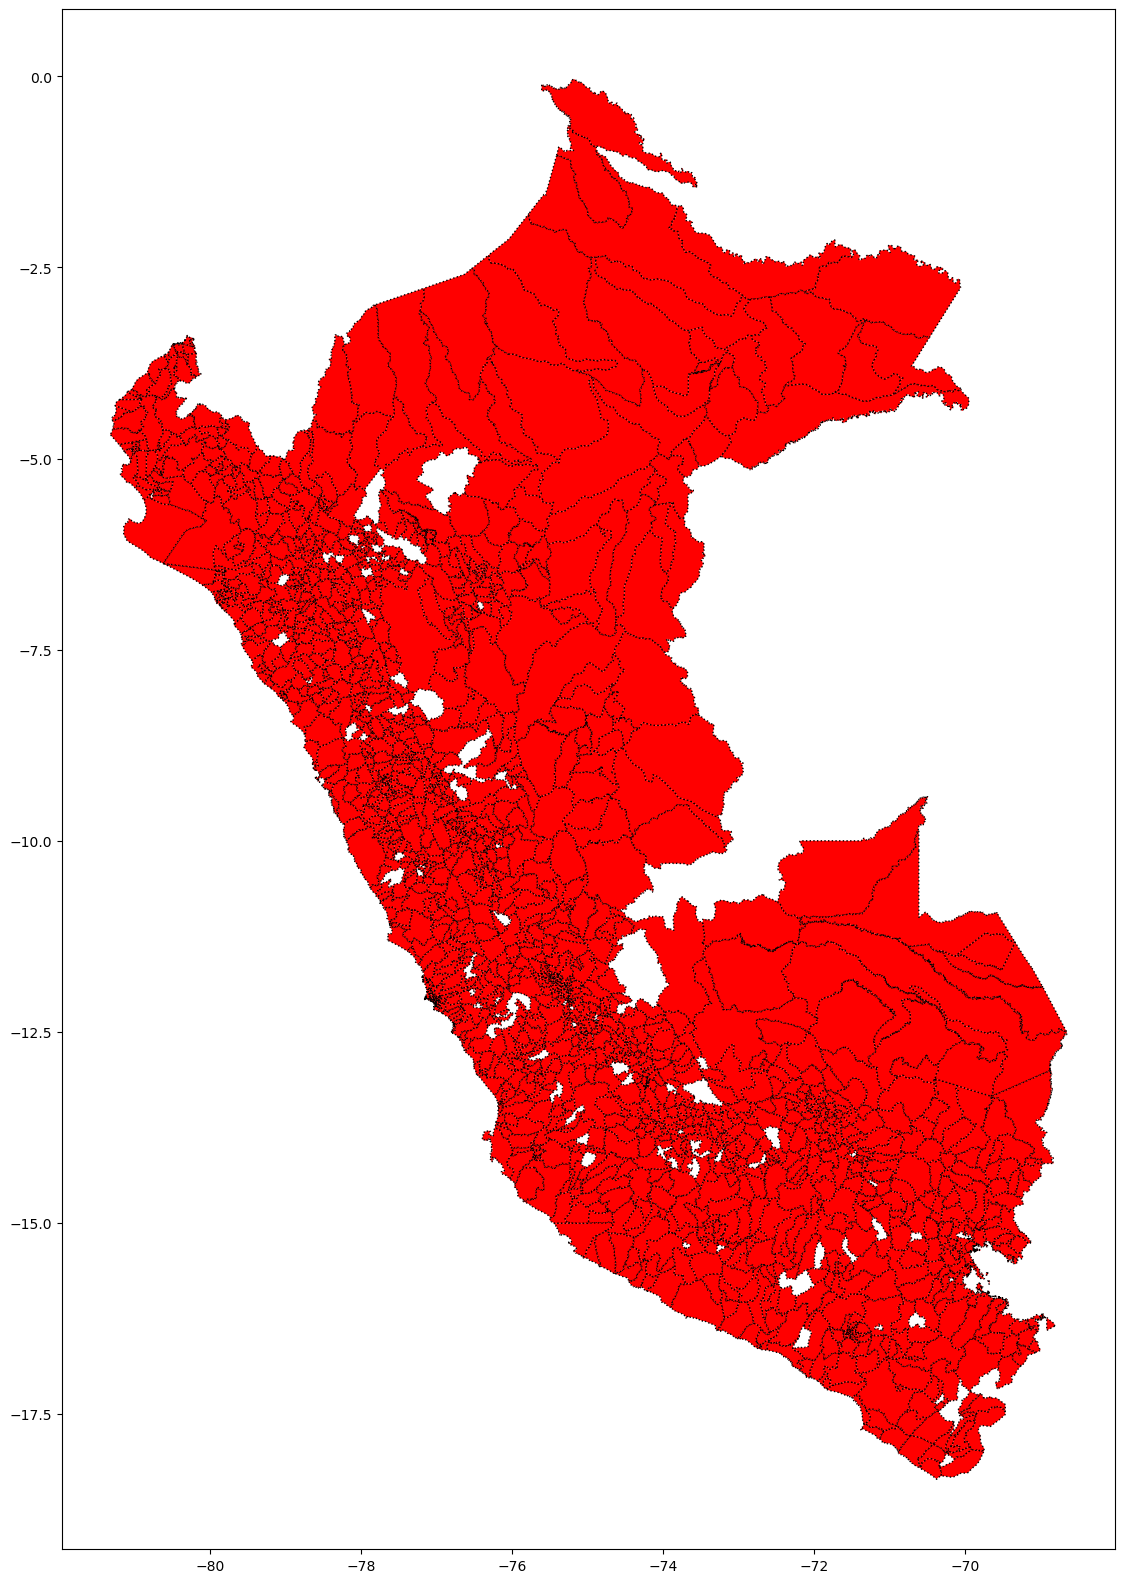

In [45]:
fig, ax = plt.subplots(figsize=(20, 20))

base.plot(  ax=ax, color='red', linestyle='dotted',
            edgecolor='black' )
plt.show()

#does not picture the provinces who dont have covid cases.

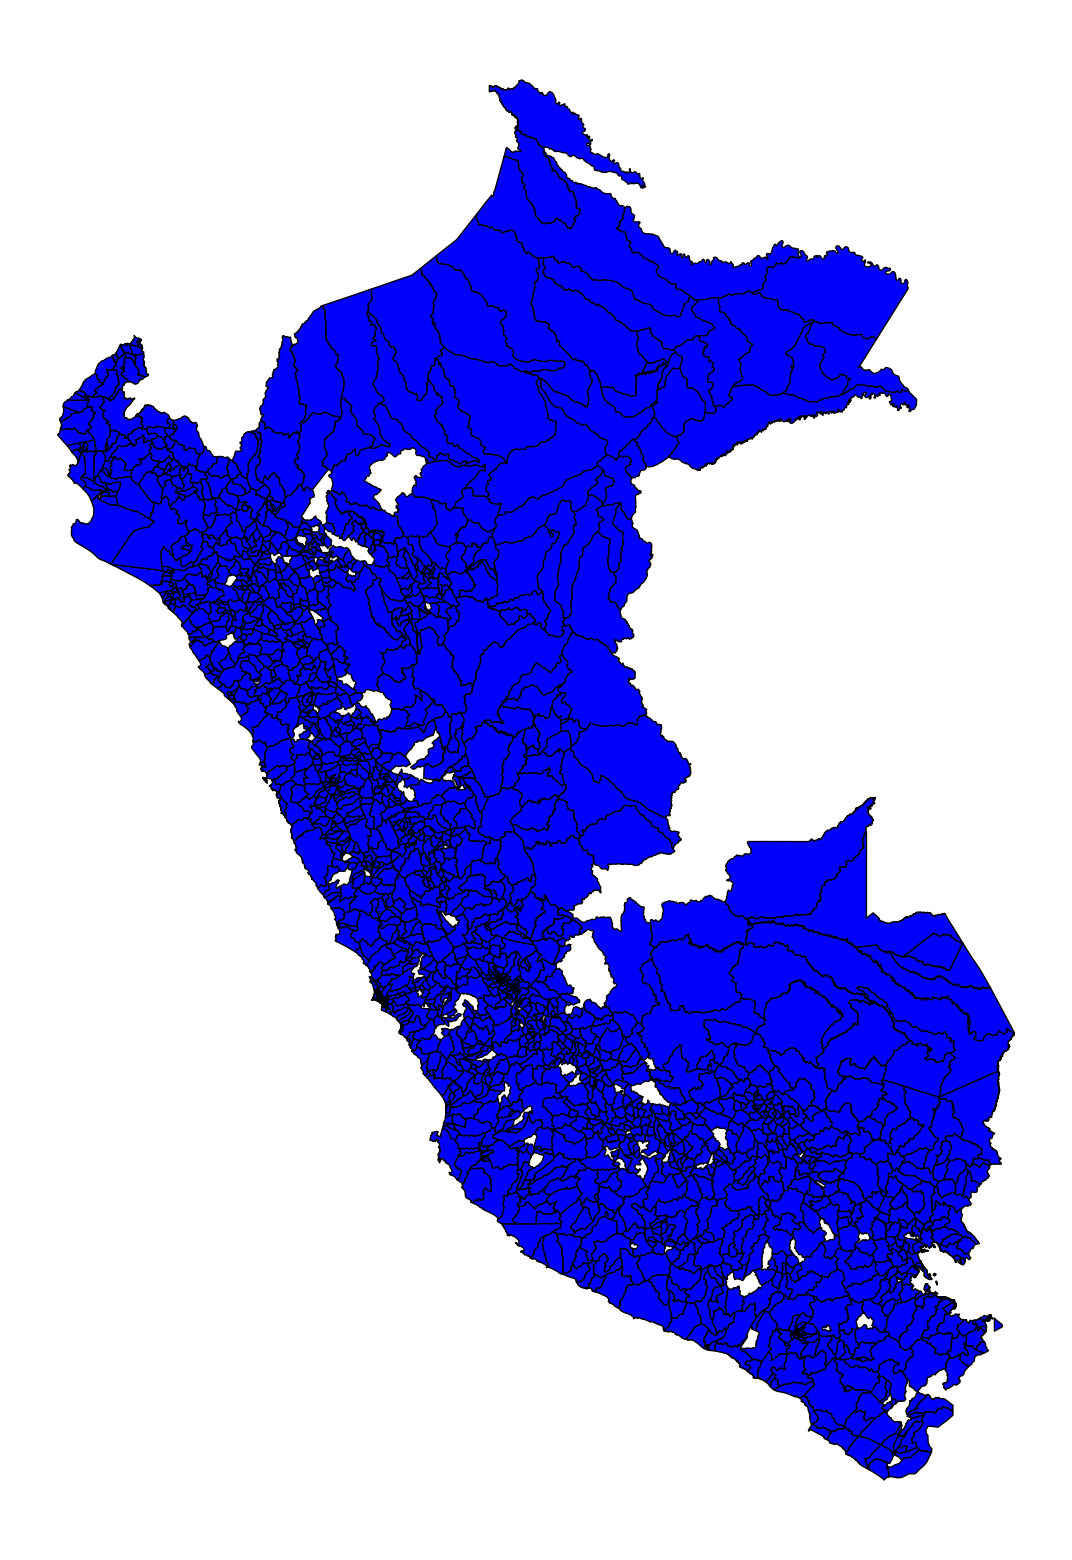

In [46]:
# Plot without axis

fig, ax = plt.subplots(figsize=(20, 20))
base.plot(ax=ax,color='blue', linestyle='-',
                      edgecolor='black')
ax.set_axis_off()

## Plot covid infection at disctrict level 

<Axes: >

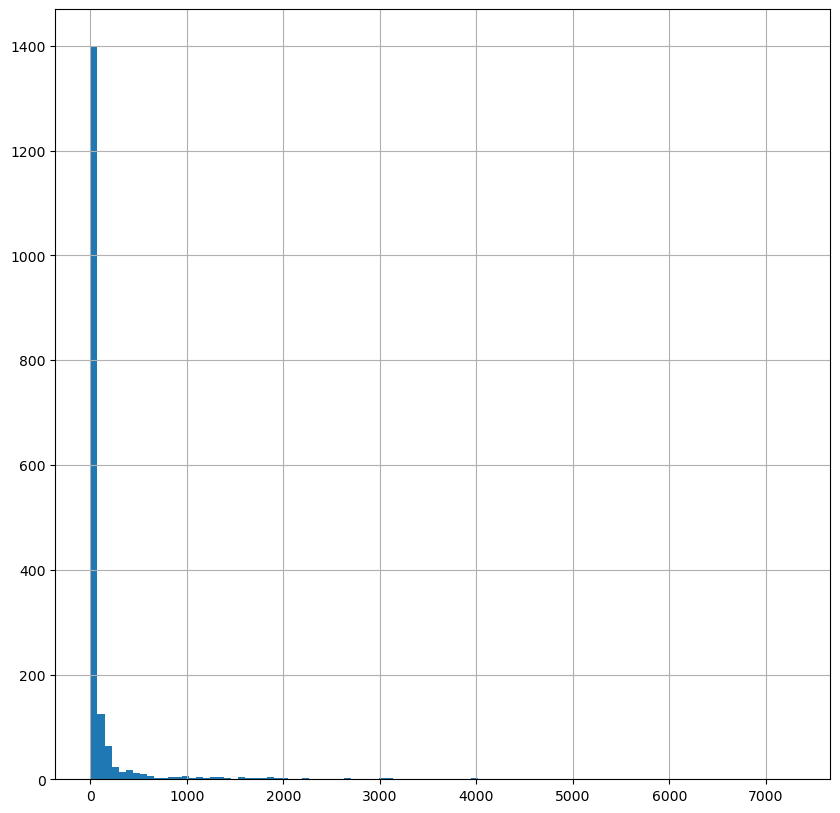

In [47]:
# First always check the distribution
fig, ax = plt.subplots(figsize=(10, 10))
base["Casos"].hist(bins = 100)

#check the distribution of the variables BEFORE PLOTTING

<Axes: >

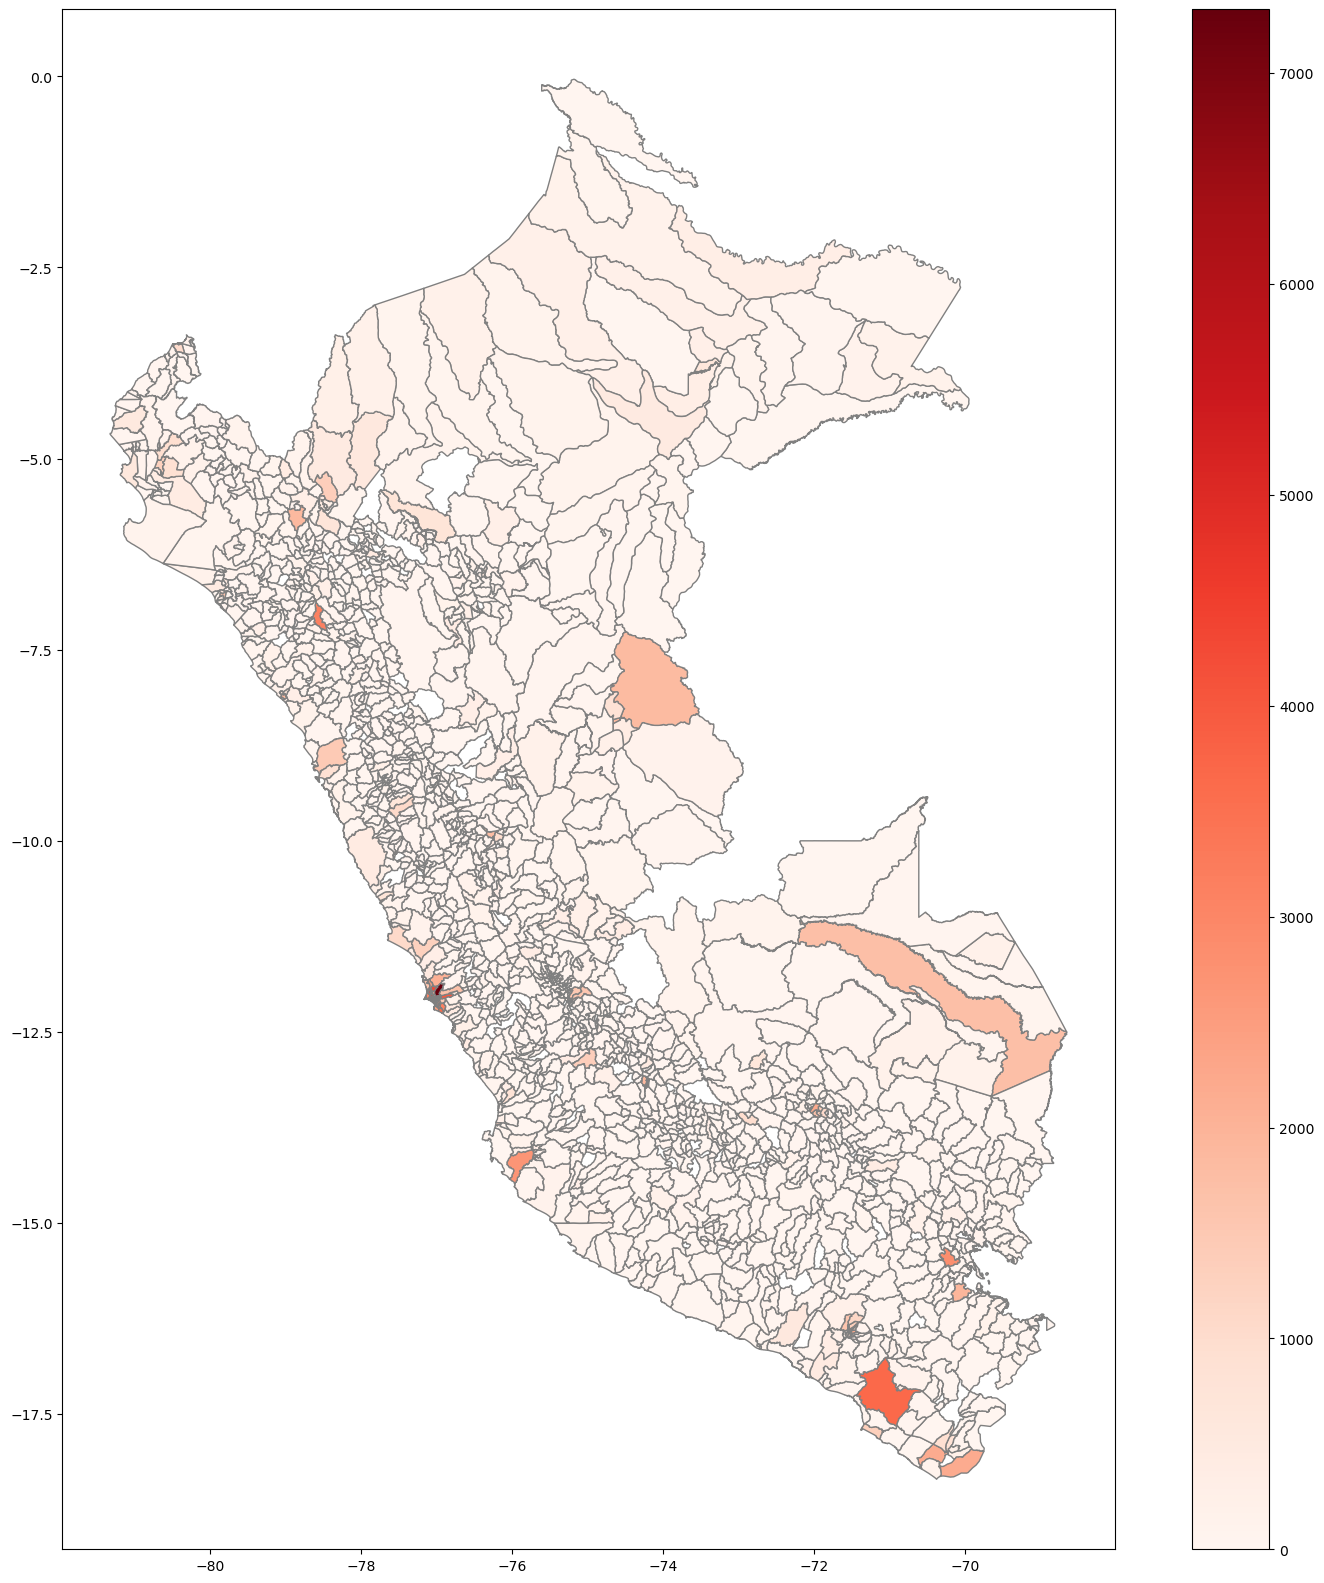

In [48]:
# Plot covid infection at disctrict level 

base.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True )

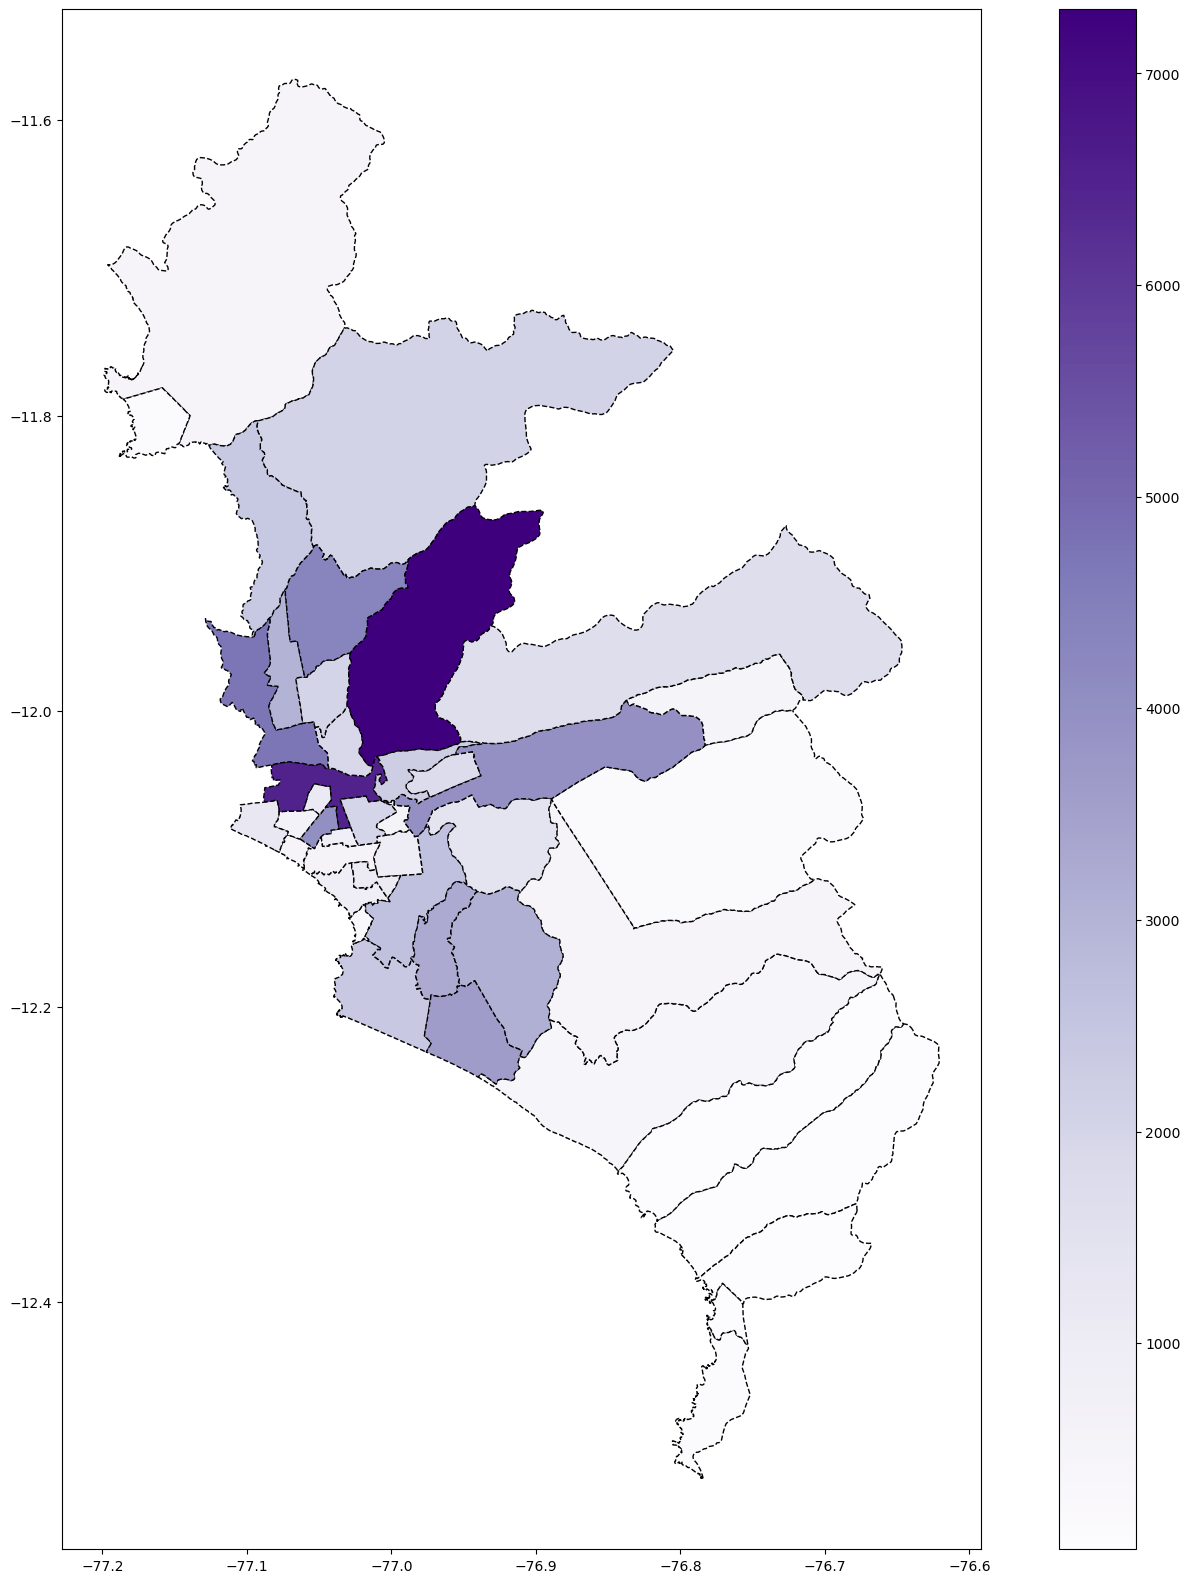

In [49]:
# Covid & Lima Matropolitana 

base_lima.plot(column='Casos', cmap='Purples', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

# save map
plt.savefig(r'Lima_covid_Heatmap.png')

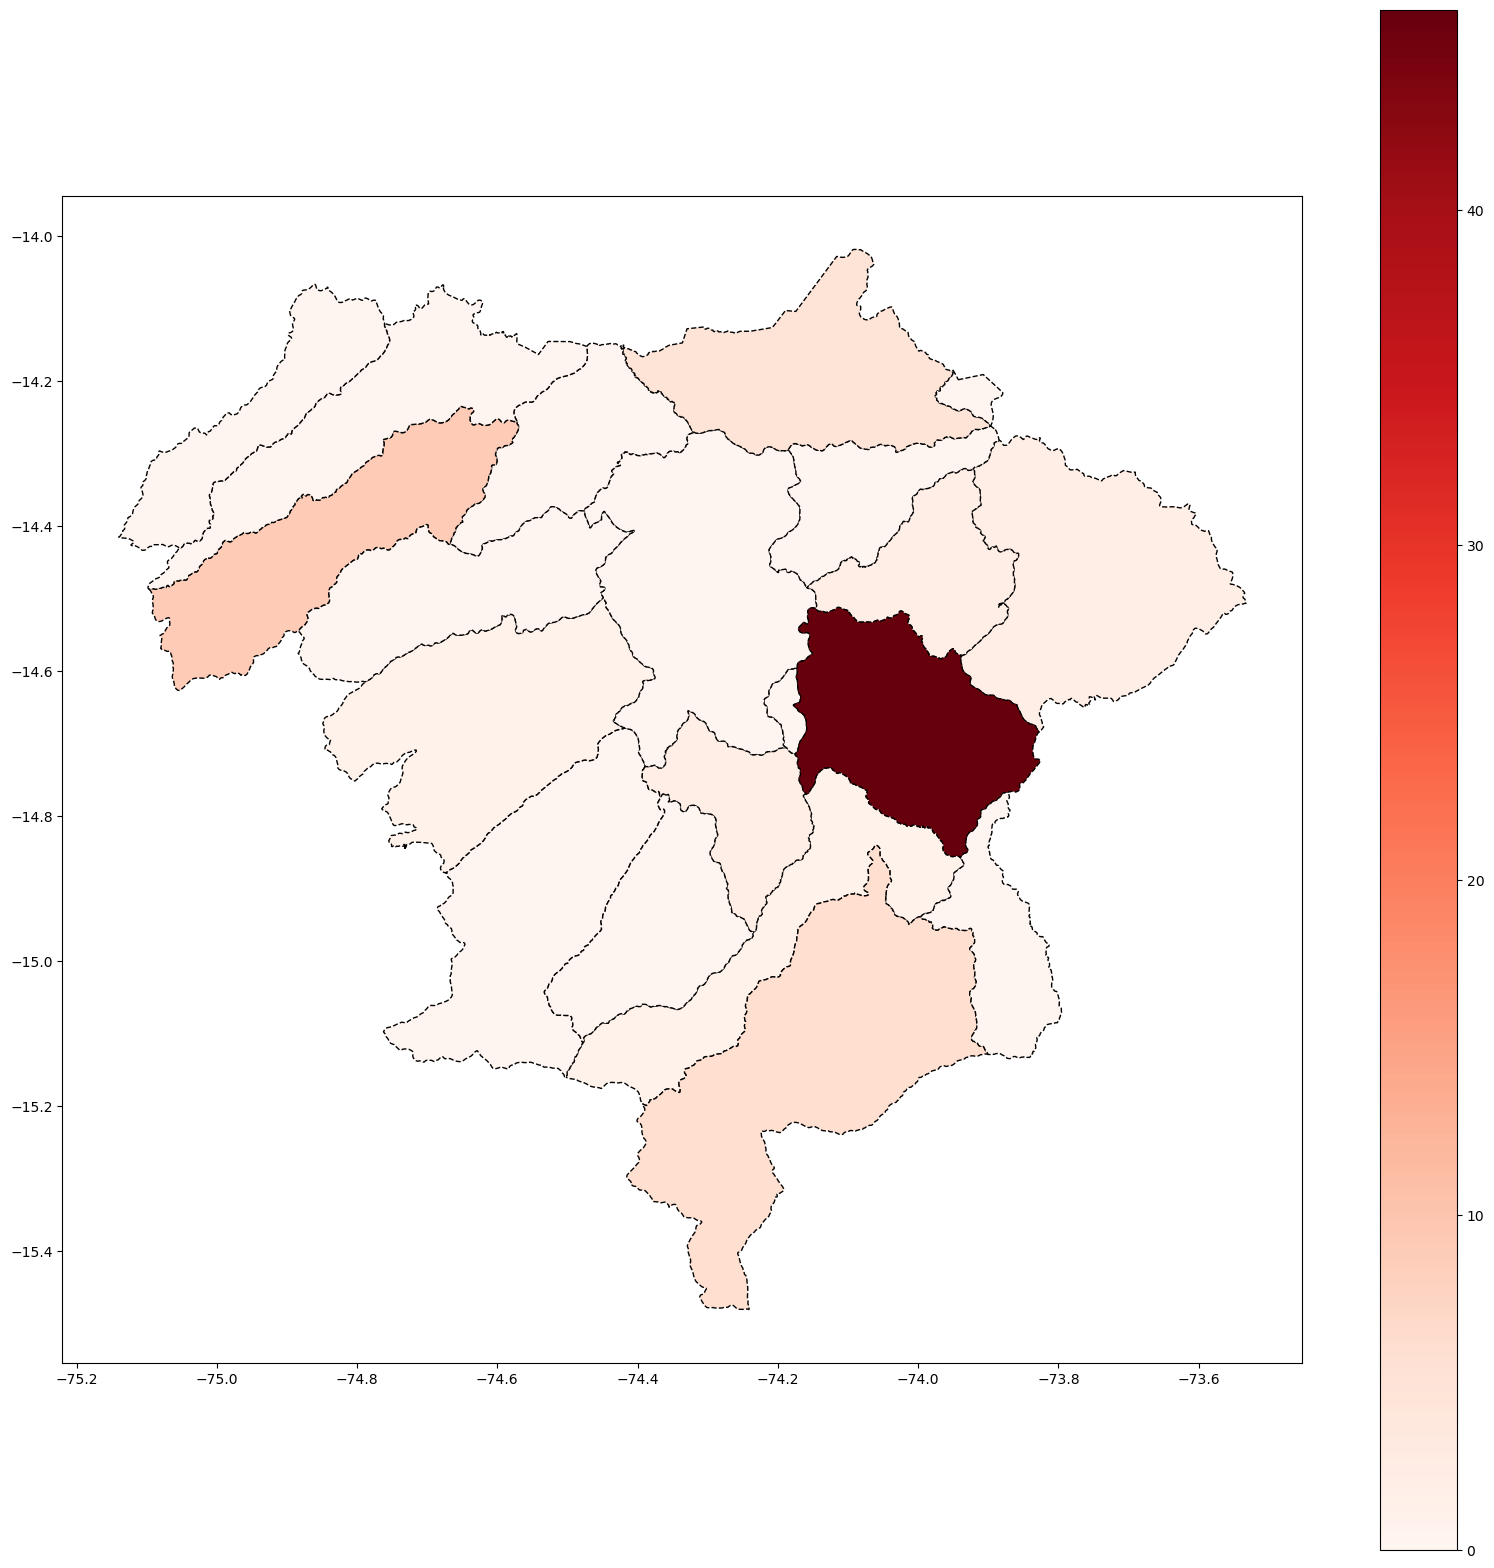

In [50]:
# Covid & Lima Matropolitana 

base_ayacucho.plot(column='Casos', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

# save map
plt.savefig(r'Ayacucho_covid_Heatmap.png')

In [ ]:
base_lima.crs

## Get Centroid

In [ ]:
# Centroid (point in the center)

#base_lima = base_lima.to_crs("EPSG:32733")
#WGS84 (MAP IN CURVE) > PROJ IN METER "EPSG:24891" TO CALCULATE CENTROID > CONVERT TO CURVE AGAIN (THE CENTROID CAN BE OUT BECAUSE IF THE IMAGE IS CONCAVA)


base_lima['centroid'] = base_lima['geometry'].to_crs("EPSG:24891").centroid.to_crs("EPSG:4326")

In [ ]:
base_lima

In [ ]:
# fig, ax = plt.subplots(figsize=(20, 20))

# # Heatmap Lima and Covid infection

# base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
#                       edgecolor='black', 
#                       legend = True, ax=ax)

In [ ]:
props = dict(boxstyle='round', facecolor = 'linen', alpha =1)
props

In [ ]:
# for point in base_lima.iterrows():
#     print(point[1]['Distrito'])

## Add District Names in Centroid

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

# Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

In [ ]:
#base_lima['centroid']

In [ ]:
# for point in base_lima.iterrows():
#     print(point[1]['Distrito'])

In [ ]:
props = dict(boxstyle='round', facecolor = 'linen', alpha =1)

In [ ]:
props

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

# Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

# add district name in litle box

props = dict(boxstyle='round', facecolor = 'linen', alpha =1)

for point in base_lima.iterrows():
        ax.text( point[1]['centroid'].x,
                 point[1]['centroid'].y,
                 point[1]['Distrito'],
                 horizontalalignment='center',
                 fontsize=10,
                 bbox=props )

plt.savefig(r'Lima_covid_Heatmap_2.png')
#plot.savefig(r'Lima_covid_Heatmap_2.png')

In [ ]:
# Using legend by district 

leg_kwds={'title':'District Name',
          'loc': 'upper left',
          'bbox_to_anchor':(1, 1.03),
          'ncol':2}


base_lima.plot(column='Distrito', cmap='tab20c', figsize=(20, 20), legend = True, linestyle='-', 
               edgecolor='black',
               legend_kwds = leg_kwds)

## Public Health Centers Data

In [ ]:
base_lima.geometry.iloc[1:2]

#NOTH (x), EAST(Y)

In [ ]:
# import csv file of public health centers: MINSA, ESSALUD and Regional Goverment
# coordinates information (NORTE: longitud) (ESTE: latitud)

health_centers = pd.read_csv(r'../_data/centros_hospitalarios.csv')
health_centers.head( 5 )

In [ ]:
health_centers.columns

In [ ]:
health_centers.NORTE

In [ ]:
# DataFrame to GeoDataFrame

Public_health = gpd.GeoDataFrame( health_centers, geometry=gpd.points_from_xy( health_centers.NORTE, health_centers.ESTE ) )
Public_health.head( 5 )

In [ ]:
# Setting UTM Zones (South): "EPSG:32733" #depending on the zone, it is PERU

# Public_health = Public_health.set_crs("EPSG:32733")
Public_health = Public_health.set_crs( "EPSG:32718", allow_override = True)
Public_health.crs

In [ ]:
Public_health.head( 5 )

## Types and classification public centers

#### We focus on Postas médicas and Hospitales

#### code2 (Type)

ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO:			1

SERVICIO MÉDICO DE APOYO:			                2

ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO:			3


#### code1 (Clasification)

ATENCION PRE HOSPITALARIA:	1

CENTROS DE ATENCION PARA DEPENDIENTES A SUSTANCIAS PSICOACTIVAS Y OTRAS DEPENDENCIAS:	2

CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO:	3

CENTROS DE SALUD O CENTROS MEDICOS:	4

CENTROS DE SALUD O CENTROS MEDICOS,CENTROS DE SALUD O CENTROS MEDICOS:	5

CENTROS DE VACUNACION:	6

CENTROS MEDICOS ESPECIALIZADOS:	7

CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES DE LA SALUD:	8

ESTABLECIMIENTOS DE RECUPERACION O REPOSO:	9

HEMODIALISIS:	10

HOSPITALES O CLINICAS DE ATENCION ESPECIALIZADA:	11

HOSPITALES O CLINICAS DE ATENCION GENERAL:	12

INSTITUTOS DE SALUD ESPECIALIZADOS:	13

MEDICINA FISICA,REHABILITACION:	14

PATOLOGIA CLINICA:	15

PATOLOGIA CLINICA,ANATOMIA PATOLOGICA:	16

PATOLOGIA CLINICA,DIAGNOSTICO POR IMAGENES:	17

POLICLINICOS:	18

PUESTOS DE SALUD O POSTAS DE SALUD:	19

PUESTOS DE SALUD O POSTAS DE SALUD,PUESTOS DE SALUD O POSTAS DE SALUD:	19

SERVICIO DE TRASLADO DE PACIENTES:	20

SERVICIO DE TRASLADO DE PACIENTES,ATENCION DOMICILIARIA:	21

SERVICIO DE TRASLADO DE PACIENTES,ATENCION DOMICILIARIA,ATENCION PRE HOSPITALARIA:	22

SERVICIO DE TRASLADO DE PACIENTES,ATENCION PRE HOSPITALARIA:	23

CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO:	24


In [ ]:
Public_health.head( 5 )

In [ ]:
# code1 = 19 to postas médicas 
# code1 = 12 & 24 to Hospitals

Public_health1 = Public_health[Public_health.code1 == "19"]

Public_health2 = Public_health[(Public_health.code1 == "12") | (Public_health.code1 == "24")]
Public_health2.head( 5 )

In [ ]:
# # Quantiles quantity of infection 

# base_lima.plot(column='Casos', cmap='Set2', figsize=(20, 20), linestyle=':', 
#                edgecolor='black',
#                legend = True)

In [ ]:
# Postas Médicas and Hospitales públicos - LIMA

PH_lima_postas = Public_health1[Public_health1.Provincia == "LIMA"]

PH_lima_hospitales = Public_health2[Public_health2.Provincia == "LIMA"]
PH_lima_hospitales

## Covid y Postas

In [ ]:
base_lima["Muertes Covid"].hist(bins=30)

In [ ]:
PH_lima_postas

In [ ]:
# Covid deaths and Postas médicas 

fig, ax = plt.subplots(figsize=(20, 20))

#Heatmap Lima and Covid infection

base_lima.plot( column='Muertes Covid', 
               cmap='Reds', 
               linestyle='--',
               edgecolor='black', 
               legend = True, 
               ax=ax )

# Plot in the shapefile (R style)
PH_lima_postas.plot(ax = ax, color = 'blue', markersize=10, edgecolor='black')

## Hospitales Públicos y Postas Médicas

In [ ]:
ax = base_lima.plot(figsize=(25, 25), color='none', edgecolor='black', zorder=3)

PH_lima_postas.plot(color='teal', label = "Postas médicas", markersize=25, ax=ax)
PH_lima_hospitales.plot(color='red', label = "Hospitales públicos", markersize=75, ax=ax)

plt.legend(loc='upper right')

In [ ]:
# Covid infection and Postas médicas 

fig, ax = plt.subplots(figsize=(20, 20))

#Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

PH_lima_postas.plot(color='black', label = "Postas médicas", markersize=25, ax=ax)
PH_lima_hospitales.plot(color='blue', label = "Hospitales públicos", markersize=75, ax=ax)

plt.legend(loc='upper right')

In [ ]:
PH_lima_hospitales['CAMAS'].describe

In [ ]:
# drop raws with nan values 

PH_lima_hospitales = PH_lima_hospitales.dropna(subset=['CAMAS'])

In [ ]:
#markersize

## Relative Size of Markers from panda series

In [ ]:
PH_lima_hospitales["CAMAS"]

In [ ]:
# Covid infection and Public Hospital by number of beds 

fig, ax = plt.subplots(figsize=(15, 15))

#define the size
markersize=PH_lima_hospitales['CAMAS']

#Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

PH_lima_hospitales.plot( ax=ax, color='blue', label = "Hospitales públicos", markersize = markersize,
                       edgecolor='black')
plt.legend(loc='upper right')

In [ ]:
# Covid infection & postas médicas at the national level 

gf = base.plot(column='Casos', cmap='Oranges', 
          figsize=(30, 30),
          linestyle='-',
          edgecolor='black',
          legend = True)

Public_health1.plot(ax = gf, color = 'red', markersize=15)

## Select Districts

In [ ]:
base_lima = base_lima.set_index("Distrito")

In [ ]:
base_lima

In [ ]:
base_lima.buffer(10000)

In [ ]:
# Get buffered region and centroid points
base_lima["buffered"] = base_lima.buffer(10000)
base_lima['centroid'] = base_lima.centroid

In [ ]:
base_lima.buffered.plot()

In [ ]:
ATE = base_lima[base_lima.UBIGEO == 150103]
ATE.plot(figsize=(10, 10))

In [ ]:
#Plot selectec districs 

ATE = base_lima.loc["ATE", "geometry"]
SJL = base_lima.loc["SAN JUAN DE LURIGANCHO", "geometry"]
SI = base_lima.loc["SAN ISIDRO", "geometry"]
LC = base_lima.loc["LINCE", "geometry"]

gpd.GeoSeries([ATE,SJL,SI,LC]).plot(figsize=(8, 8),linestyle='-',
                                    edgecolor='black')

## Limits - Boarders

In [ ]:
# Logic operations:

# Lince and San Isidro share limits 

LC.touches(SI)

In [ ]:
LC.touches(ATE)

In [ ]:
#Distance ATE y (SAN ISIDRO, LINCE)

ATE.distance(SI)

In [ ]:
gpd.GeoSeries([ATE, SI]).plot(figsize=(8, 8),linestyle='-',
                                    edgecolor='black')

In [ ]:
ATE.distance(LC)

In [ ]:
# Add line that cross Lince and ATE

ate_point = base_lima['centroid']['ATE']
lc_point = base_lima['centroid']['LINCE']
sb_point = base_lima['centroid']['SAN BORJA']
lr_point = base_lima['centroid']['LURIN']
ac_point = base_lima['centroid']['ANCON']


In [ ]:
# Add line that cross Lince and ATE

ate_lince = LineString(zip((ate_point.x , lc_point.x ), (ate_point.y, lc_point.y)))

fig, ax = plt.subplots(figsize=(20,20))
base_lima.plot(color='lightgray', ax=ax, linestyle='-',
                                    edgecolor='black')

gpd.GeoSeries([ate_lince]).plot(color='red', linestyle='--', ax = ax)

In [ ]:
base_lima['area']=base_lima.area
base_lima

In [ ]:
#Distamce between San Juan de Lurigancho to other districs 

SJL_point = base_lima['centroid']["SAN JUAN DE LURIGANCHO"]
    
base_lima['distance'] = base_lima['centroid'].distance(SJL_point)

In [ ]:
base_lima['distance'].sort_values(ascending=False)

In [ ]:

base_lima['distance'].sort_values(ascending=False).plot.bar(figsize=(12, 7), color = 'red', edgecolor='black')

In [ ]:
ate_point.type

In [ ]:
# SJL and other districs 

d1 = LineString(zip((SJL_point.x , lc_point.x ), (SJL_point.y, lc_point.y)))
d2 = LineString(zip((SJL_point.x , ate_point.x ), (SJL_point.y, ate_point.y)))
d3 = LineString(zip((SJL_point.x , sb_point.x ), (SJL_point.y, sb_point.y)))
d4 = LineString(zip((SJL_point.x , lr_point.x ), (SJL_point.y, lr_point.y)))
d5 = LineString(zip((SJL_point.x , ac_point.x ), (SJL_point.y, ac_point.y)))

fig, ax = plt.subplots(figsize=(20,20))
base_lima.plot(color='white', ax=ax, linestyle='-',
                                    edgecolor='black')

for i in range(1,6):
    gpd.GeoSeries(globals()[f'd{i}']).plot(color='red', linestyle='--', ax = ax, linewidth = 2.5)



## ArcGis Operations in Geopandas

In [ ]:
dist_shp = gpd.read_file(r'../_data/shape_file/DISTRITOS.shp')

### Get Centroids
Get the centroids of each geometry (district).

In [ ]:
dist_shp.crs

In [ ]:
dist_shp.to_crs(24891).centroid.to_crs( 4326 )

In [ ]:
dist_shp.crs

We get warnings since we need to reproject this shapefile object to a CRS in meters. This CRS should be a plane area to the specific zone of the shapefile ([more info](https://stackoverflow.com/questions/63004400/getting-a-userwarning-when-calculating-centroid-of-a-geoseries)). In the case of Peru, we use 24891 ([more info](https://epsg.io/24891)).



In [ ]:
projected_dist_shp = dist_shp.to_crs( epsg = 24891 )

projected_dist_shp[ 'centroids'] = projected_dist_shp.centroid

Then, we reproject again the centroids to the original CRS.

In [ ]:
dist_shp[ 'Centroid_Latitude' ] = projected_dist_shp[ 'centroids' ].to_crs( epsg = 4326 ).y
dist_shp[ 'Centroid_Longitude' ] = projected_dist_shp[ 'centroids' ].to_crs( epsg = 4326 ).x

## Intersection

In [ ]:
health_centers = pd.read_csv( r"../_data\salud_places_peru.csv")

In [ ]:
ht1 = health_centers[ health_centers.latitud != 0 ]

In [ ]:
# Make ht1 a geopandas
ht1_geo = gpd.GeoDataFrame( ht1 , 
                           geometry= gpd.points_from_xy( 
                                      ht1.longitud, 
                                      ht1.latitud))

Check CRS

We found that geolocation is recognized by google maps. We set the CRS that correspond to google maps.

In [ ]:
ht1_geo_crs = ht1_geo.set_crs( epsg = 4326 )

Find Ubigeo for each point

In [ ]:
# Just take 10% of observations
ht2_geo = ht1_geo_crs.sample( frac = 0.10 )

In [ ]:
# Intersect with maps
intersected_ht = gpd.overlay( ht2_geo , maps , how = 'intersection' )

In [ ]:
ht2_geo.columns

In [ ]:
intersected_ht

## Aggregation

We have shapefiles at district levels. It is possible to aggregate districts at Department or Province level.

In [ ]:
dist_shp.plot()

In [ ]:
prov_shp = dist_shp.dissolve( by = 'IDPROV' )

In [ ]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dist_shp.plot( ax = ax )

In [ ]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
prov_shp.plot( ax = ax )

In [ ]:
dpt_shp = dist_shp.dissolve( by = 'IDDPTO' )

In [ ]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dpt_shp.plot( ax = ax )

In [ ]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dist_shp.plot( ax = ax )
dpt_shp.plot( ax = ax, facecolor="none",  edgecolor='black', lw=0.7 )

## Checking CRS

In [ ]:
# Border of Switzerland
ch_borders = gpd.read_file( r'../_data/eu_maps/CHE_adm0.shp')

# Border of Germany
de_borders = gpd.read_file( r'../_data/eu_maps/gadm36_DEU_0.shp')

# Switzerland lakes shape files
ch_lakes = gpd.GeoDataFrame.from_file( r'../_data/eu_maps/g2s15.shp')

# muni
Geo_muni = gpd.read_file( r"../_data/eu_maps/VG250_GEM.shp" )

Plots with different CRS

In [ ]:

fig = plt.figure(figsize=(40, 20), dpi=100)
ax = fig.add_subplot(111, frame_on = False )

# German Plot
Geo_muni.plot( ax = ax )

# switzerland borders
ch_borders.geometry.boundary.plot(color = 'black', ax=ax, edgecolor='0.2', linewidth=1.5) 

# # Swiss lakes
ch_lakes.plot(color='lightblue' , ax=ax, edgecolor='0.2', linewidth=0.4, legend=True)

ax.axis('off')

# # define coordinates for the plot area
# ax.set_xlim(455869.5728, 927076.5648)
# #ax.set_ylim( auto = True)
# ax.set_ylim(60443.1884, 529941.7864)

# Save in pdf
# plt.savefig('maps/inventors_BW_bar_legend.pdf')


Check CRS

In [ ]:
shp_files = [ ch_borders, de_borders, ch_lakes, Geo_muni ]

In [ ]:
for shp in shp_files:
    print( shp.crs )
    
#cada informacion esta por su CRS, debe cambiarse

Reproject CRS

In [ ]:
Geo_muni_crs = Geo_muni.to_crs( 21781 )

In [ ]:
ch_borders_crs = ch_borders.to_crs( 21781 )

In [ ]:

fig = plt.figure(figsize=(40, 20), dpi=100)
ax = fig.add_subplot(111, frame_on = False )

# German Plot
Geo_muni_crs.plot( ax = ax )

# switzerland borders
ch_borders_crs.geometry.boundary.plot(color = 'black', ax=ax, edgecolor='0.2', linewidth=1.5) 

# # Swiss lakes
ch_lakes.plot(color='lightblue' , ax=ax, edgecolor='0.2', linewidth=0.4, legend=True)

ax.axis('off')

# # define coordinates for the plot area
# ax.set_xlim(455869.5728, 927076.5648)
#ax.set_ylim( auto = True)
# ax.set_ylim(60443.1884, 529941.7864)

# Save in pdf
# plt.savefig('maps/inventors_BW_bar_legend.pdf')


## References:


### Geopandas
https://geopandas.org/en/stable/docs/user_guide/set_operations.html

https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html

https://geopandas.org/en/stable/docs/user_guide/data_structures.html

https://www.kaggle.com/imdevskp/geopandas

### Coordinate Reference System

https://geopandas.org/en/stable/docs/user_guide/projections.html

#### Types of projections

https://spatialreference.org/

#### Universal Transverse Mercator (UTM)

https://manifold.net/doc/mfd9/universal_transverse_mercator_projection.htm

